In [108]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
chemin_fichier = 'C:\\Users\\douja\\OneDrive\\Desktop\\Formation Data Analyst\\Projets Fil Rouge_Data\\Données Projet Financement Participatif//Kickstarter Campaigns DataSet.csv'

df = pd.read_csv(chemin_fichier)

In [110]:
df = df.drop(['Unnamed: 0','slug','name','blurb','creator_id','id'], axis = 1)
#on va compter les lignes en doubles
print("duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)

print("length of dataset after removal of duplicates is ", len(df))


duplicates:  19527
length of dataset after removal of duplicates is  197718


In [111]:

df.head()

,currency,launched_at,backers_count,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0


In [112]:
df.describe(include='object')

,currency,launched_at,country,deadline,status,sub_category,main_category,city
count,197718,197718,197718,197718,197718,197718,197718,197718
unique,15,192696,25,181261,4,15,159,13409
top,USD,2020-12-15 13:00:19,US,2016-04-01 03:59:00,successful,film & video,Web,Los Angeles
freq,133496,4,133496,21,109205,27652,3981,8718


In [113]:
df.describe()

,backers_count,usd_pledged,blurb_length,goal_usd,duration
count,197718.000000,1.977180e+05,197718.000000,1.977180e+05,197718.000000
mean,144.983790,1.329122e+04,107.993668,4.283263e+04,33.188971
std,928.074371,1.054646e+05,30.043704,1.164370e+06,12.286915
min,0.000000,0.000000e+00,1.000000,1.000000e-02,1.000000
25%,3.000000,1.000000e+02,92.000000,1.500000e+03,30.000000
50%,25.000000,1.453987e+03,121.000000,5.000000e+03,30.000000
75%,87.000000,6.376862e+03,131.000000,1.300000e+04,35.000000
max,105857.000000,1.296961e+07,196.000000,1.354034e+08,98.000000


In [114]:
df.shape

(197718, 13)

In [115]:
# Calcul des statistiques pour les projets 'successful'
successful = df[df['status'] == 'successful']
successful_stats = {
    'nombre de projets': len(successful),
    'proportion': len(successful) / len(df),
    'montant total goal_usd': successful['goal_usd'].sum(),
    'moyenne goal_usd': successful['goal_usd'].mean(),
    'montant max usd_pledged': successful['usd_pledged'].max(),
    'moyenne usd_pledged': successful['usd_pledged'].mean(),
    'ratio en % goal_usd/usd_pledged': (successful['goal_usd'] / successful['usd_pledged']).mean() * 100,
    'moyenne duration': successful['duration'].mean(),
    'moyenne backers_count': successful['backers_count'].mean(),
    'moyenne blurb_length': successful['blurb_length'].mean()
    }

# Calcul des statistiques pour les projets 'failed'
failed = df[df['status'] == 'failed']
failed_stats = {
    'nombre de projets': len(failed),
    'proportion': len(failed) / len(df),
    'montant total goal_usd': failed['goal_usd'].sum(),
    'moyenne goal_usd': failed['goal_usd'].mean(),
    'montant max usd_pledged': failed['usd_pledged'].max(),
    'moyenne usd_pledged': failed['usd_pledged'].mean(),
    'ratio en % goal_usd/usd_pledged': (failed['goal_usd'] / failed['usd_pledged']).mean() * 100,
    'moyenne duration': failed['duration'].mean(),
    'moyenne backers_count': failed['backers_count'].mean(),
    'moyenne blurb_length': failed['blurb_length'].mean()
    }

# Calcul des statistiques pour le total (projets 'successful' + projets 'failed')
total_stats = {
    'nombre de projets': len(df),
    'proportion': 1.0,
    'montant total goal_usd': df['goal_usd'].sum(),
    'moyenne goal_usd': df['goal_usd'].mean(),
    'montant max usd_pledged': df['usd_pledged'].max(),
    'moyenne usd_pledged': df['usd_pledged'].mean(),
    'ratio en % goal_usd/usd_pledged': (df['goal_usd'] / df['usd_pledged']).mean() * 100,
    'moyenne duration': df['duration'].mean(),
    'moyenne backers_count': df['backers_count'].mean(),
    'moyenne blurb_length': df['blurb_length'].mean()
}

# Création d'un DataFrame à partir des statistiques calculées
result = pd.DataFrame({'successful': successful_stats, 'failed': failed_stats, 'total': total_stats})

# Affichage du DataFrame résultant
print(result)




                                   successful        failed         total
nombre de projets                1.092050e+05  7.569400e+04  1.977180e+05
proportion                       5.523271e-01  3.828382e-01  1.000000e+00
montant total goal_usd           9.683189e+08  6.230780e+09  8.468782e+09
moyenne goal_usd                 8.866983e+03  8.231538e+04  4.283263e+04
montant max usd_pledged          1.296961e+07  6.076284e+05  1.296961e+07
moyenne usd_pledged              2.270710e+04  1.060874e+03  1.329122e+04
ratio en % goal_usd/usd_pledged  7.210666e+01           inf           inf
moyenne duration                 3.117323e+01  3.545432e+01  3.318897e+01
moyenne backers_count            2.491350e+02  1.176227e+01  1.449838e+02
moyenne blurb_length             1.074140e+02  1.098001e+02  1.079937e+02


In [116]:
columns = ['currency','launched_at','backers_count','country','deadline','status','usd_pledged','sub_category','main_category','blurb_length','goal_usd','city','duration']

for column in columns:
    num_modalities = df[column].nunique()
    print("Nombre de modalités de", column, ":", num_modalities)

Nombre de modalités de currency : 15
Nombre de modalités de launched_at : 192696
Nombre de modalités de backers_count : 3438
Nombre de modalités de country : 25
Nombre de modalités de deadline : 181261
Nombre de modalités de status : 4
Nombre de modalités de usd_pledged : 89142
Nombre de modalités de sub_category : 15
Nombre de modalités de main_category : 159
Nombre de modalités de blurb_length : 152
Nombre de modalités de goal_usd : 12153
Nombre de modalités de city : 13409
Nombre de modalités de duration : 93


In [117]:
# Vérification Présence des NAN
df.isnull().sum()

currency         0
launched_at      0
backers_count    0
country          0
deadline         0
status           0
usd_pledged      0
sub_category     0
main_category    0
blurb_length     0
goal_usd         0
city             0
duration         0
dtype: int64

In [118]:
df.status.value_counts()

successful    109205
failed         75694
canceled        9284
live            3535
Name: status, dtype: int64

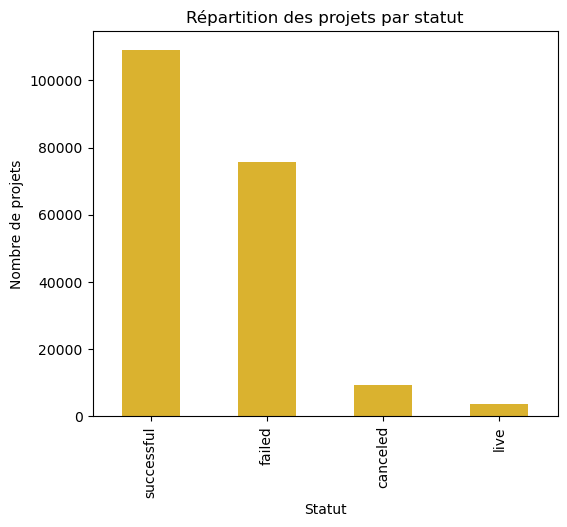

In [119]:
state_counts = df["status"].value_counts()

plt.figure(figsize=(6,5))
state_counts.plot(kind="bar", color = "#DAB22F")
plt.title("Répartition des projets par statut")
plt.xlabel("Statut")
plt.ylabel("Nombre de projets")
plt.show()
#on peut aussi calculer le % de successfull par rapport au total

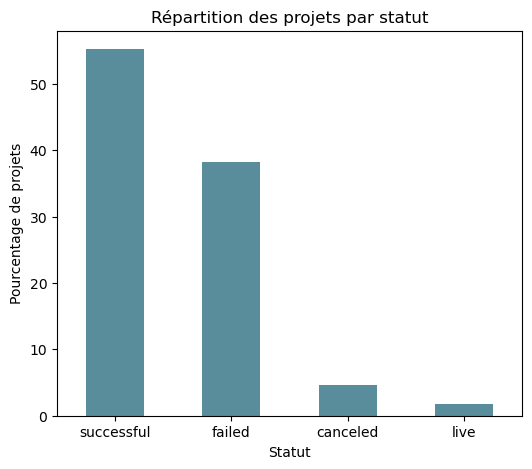

In [120]:
total_projects = len(df)
state_percentages = (state_counts / total_projects) * 100

# Créer le graphique en barres avec les pourcentages
plt.figure(figsize=(6, 5))
state_percentages.plot(kind="bar", color="#598D9B")
plt.title("Répartition des projets par statut")
plt.xlabel("Statut")
plt.ylabel("Pourcentage de projets")
plt.xticks(rotation=0)  # Pour garder les étiquettes de statut à l'horizontal
plt.show()

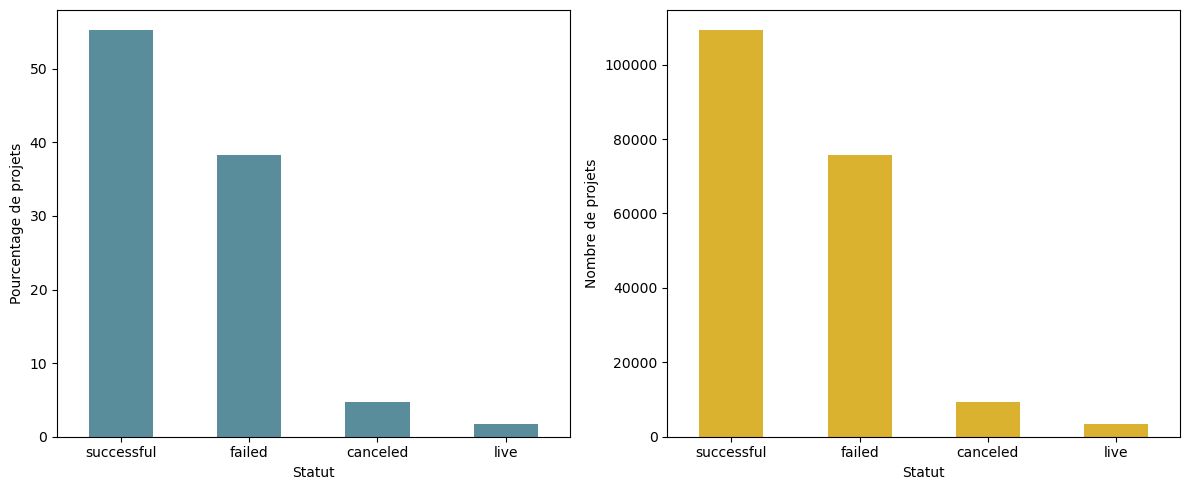

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Premier sous-graphique (à gauche)
# Graphique de répartition des projets par statut
state_percentages.plot(kind="bar", color="#598D9B", ax=axs[0])

axs[0].set_xlabel("Statut")
axs[0].set_ylabel("Pourcentage de projets")
axs[0].tick_params(axis="x", rotation=0)  # Pour garder les étiquettes de statut à l'horizontal

# Deuxième sous-graphique (à droite)
# Graphique de répartition des projets par statut en nombre absolu
state_counts.plot(kind="bar", color="#DAB22F", ax=axs[1])

axs[1].set_xlabel("Statut")
axs[1].set_ylabel("Nombre de projets")
axs[1].tick_params(axis="x", rotation=0)  # Pour garder les étiquettes de statut à l'horizontal

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les sous-graphiques
plt.show()


In [122]:

#supprimer les projets canceled et live du Dataset
df= df.loc[(df['status']=='successful') | (df['status']=='failed')]
print(df['status'].unique())

['failed' 'successful']


C:\Users\douja\AppData\Local\Temp\ipykernel_17464\15820044.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_and_other = top_countries.append(pd.Series([other_total], index=['Autres']))


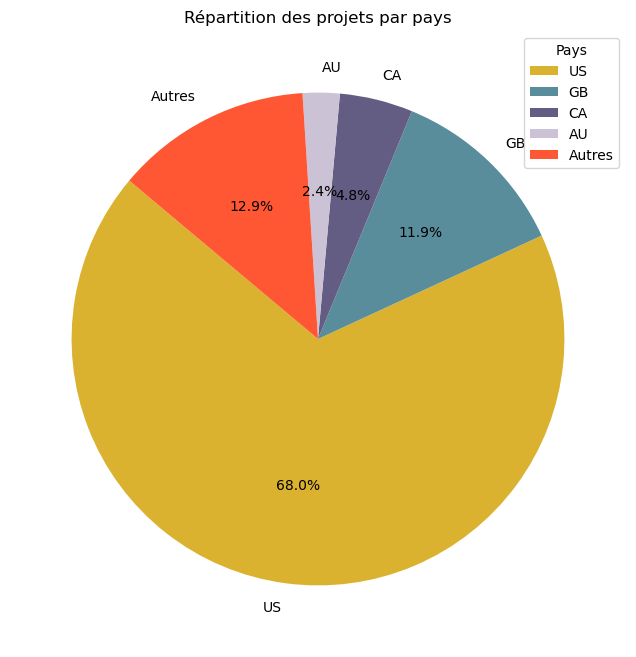

In [123]:
# Compter le nombre de projets par pays
country_counts = df['country'].value_counts()

# Sélectionner les quatre premiers pays et regrouper les autres
top_countries = country_counts[:4]
other_countries = country_counts[4:]
other_total = other_countries.sum()

# Créer une nouvelle série avec les quatre premiers pays et "Autres"
top_and_other = top_countries.append(pd.Series([other_total], index=['Autres']))

# Définir des couleurs personnalisées
colors = ['#DAB22F', '#598D9B', '#635D83', '#CCC2D6', '#FF5733', '#6B4226', '#A2AB58', '#8E7A6A']

# Créer le graphique en secteurs (pie chart) avec les couleurs personnalisées
plt.figure(figsize=(8, 8))
plt.pie(top_and_other, labels=top_and_other.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Répartition des projets par pays')

# Afficher la légende
plt.legend(top_and_other.index, title="Pays", loc="upper right")

plt.show()

In [124]:

df.rename(columns={"sub_category": "Category",
                  "main_category": "sub_category"}, inplace=True)

In [125]:
columns={"usd_pledged": "Pledged",
          "backers_count": "Backers",
         "goal_usd": "Goal"
        }

df.rename(columns=columns, inplace=True)
df.head()

,currency,launched_at,Backers,country,deadline,status,Pledged,Category,sub_category,blurb_length,Goal,city,duration
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0


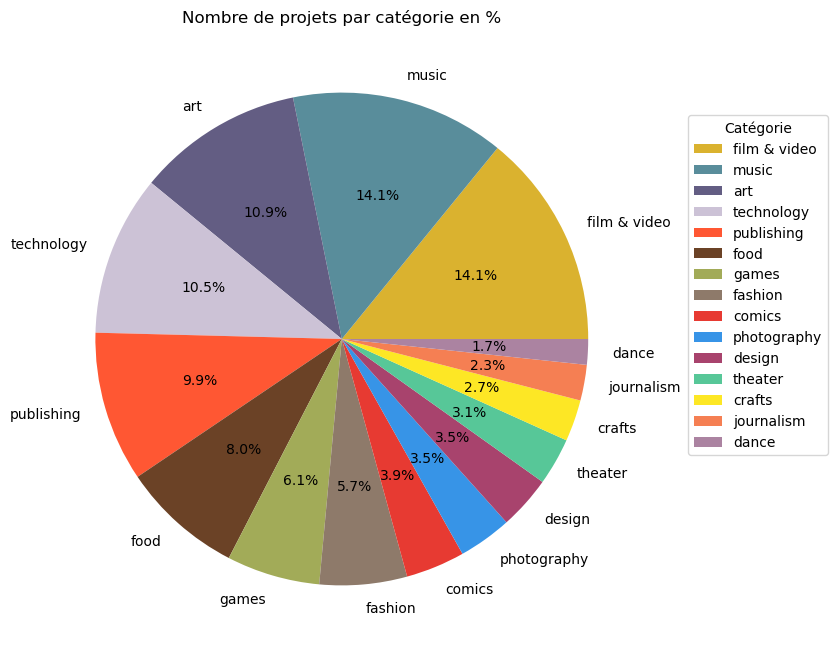

In [126]:

# Compter le nombre de projets par catégorie
category_counts = df['Category'].value_counts()

# Utiliser la palette de couleurs Seaborn
colors = [
    '#DAB22F', '#598D9B', '#635D83', '#CCC2D6', '#FF5733', 
    '#6B4226', '#A2AB58', '#8E7A6A', '#E73A32', '#3794E7',
    '#A8436D', '#57C798', '#FDE725', '#F57F53', '#AB83A1'
]



# Créer le graphique en secteurs (pie chart) avec les pourcentages et les couleurs personnalisées
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Nombre de projets par catégorie en %')

# Afficher la légende
plt.legend(category_counts.index, title="Catégorie", loc="lower right", bbox_to_anchor=(1.3, 0.3))

plt.show()

In [127]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

df3 = df[df['status'].isin(['successful', 'failed'])]
df3['launched_at'] = pd.to_datetime(df3['launched_at'])
df3['deadline'] = pd.to_datetime(df3['deadline'])
df3['success'] = df3['status'] == 'successful'
df_grouped = df3.groupby(pd.Grouper(key='launched_at', freq='M')).agg({'success': ['sum', 'count']})
df_grouped.columns = ['success_count', 'total_count']
df_grouped['success_percentage'] = df_grouped['success_count'] / df_grouped['total_count'] * 100
df_grouped['month_year'] = df_grouped.index.strftime('%B %Y')
source = ColumnDataSource(df_grouped)
output_notebook()
plt.figure(figsize=(12,10))
p = figure(x_axis_type='datetime', title='Success Percentages on Monthly Basis')
p.xaxis.axis_label = 'Timeline'
p.yaxis.axis_label = 'Count'
success_line = p.line(x='launched_at', y='success_count', line_color=Category10[3][0], legend_label='Successful',
                      source=source)
failed_line = p.line(x='launched_at', y='total_count', line_color=Category10[3][1], legend_label='Failed',
                     source=source)
hover = HoverTool(renderers=[success_line, failed_line],
                  tooltips=[('Month', '@month_year'), ('Successful', '@success_count'), ('Failed', '@total_count')])
p.add_tools(hover)
show(p);

Loading BokehJS ...

<Figure size 1200x1000 with 0 Axes>

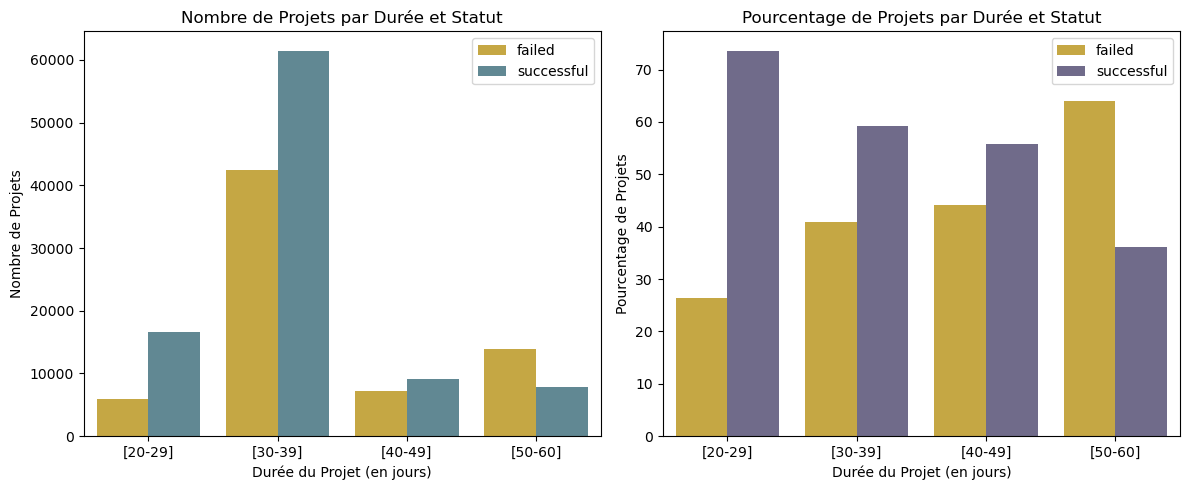

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous ayez un DataFrame appelé df contenant la colonne "duration".

# Créer des catégories pour la durée des projets
bins = [20, 29, 39, 49, 60]  # Ajuster les intervalles pour exclure les 30 jours
labels = ['[20-29]', '[30-39]', '[40-49]', '[50-60]']  # Ajuster les libellés des catégories
df['duration_category'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Utiliser pd.crosstab() pour obtenir le décompte par catégorie et par statut
table = pd.crosstab(df['duration_category'], df['status'])
# Réorganiser les données pour les barres côte à côte
table_stacked = table.stack().reset_index().rename(columns={0: 'count'})
table_stacked = table_stacked.loc[(table_stacked['status'] == 'successful') | (table_percent['status'] == 'failed')]
# Réorganiser les données pour les pourcentages
table_percent = table.div(table.sum(axis=1), axis=0) * 100
table_percent = table_percent.stack().reset_index().rename(columns={0: 'percentage'})
table_percent = table_percent.loc[(table_percent['status'] == 'successful') | (table_percent['status'] == 'failed')]

# Créer le premier graphique en subplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='duration_category', y='count', hue='status', data=table_stacked, palette=['#DAB22F', '#598D9B'])
plt.xlabel('Durée du Projet (en jours)')
plt.ylabel('Nombre de Projets')
plt.title('Nombre de Projets par Durée et Statut')
plt.legend()

# Créer le deuxième graphique en subplot
plt.subplot(1, 2, 2)
sns.barplot(x='duration_category', y='percentage', hue='status', data=table_percent, palette=['#DAB22F', '#6C668F'])
plt.xlabel('Durée du Projet (en jours)')
plt.ylabel('Pourcentage de Projets')
plt.title('Pourcentage de Projets par Durée et Statut')
plt.legend()

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques en subplot
plt.show()


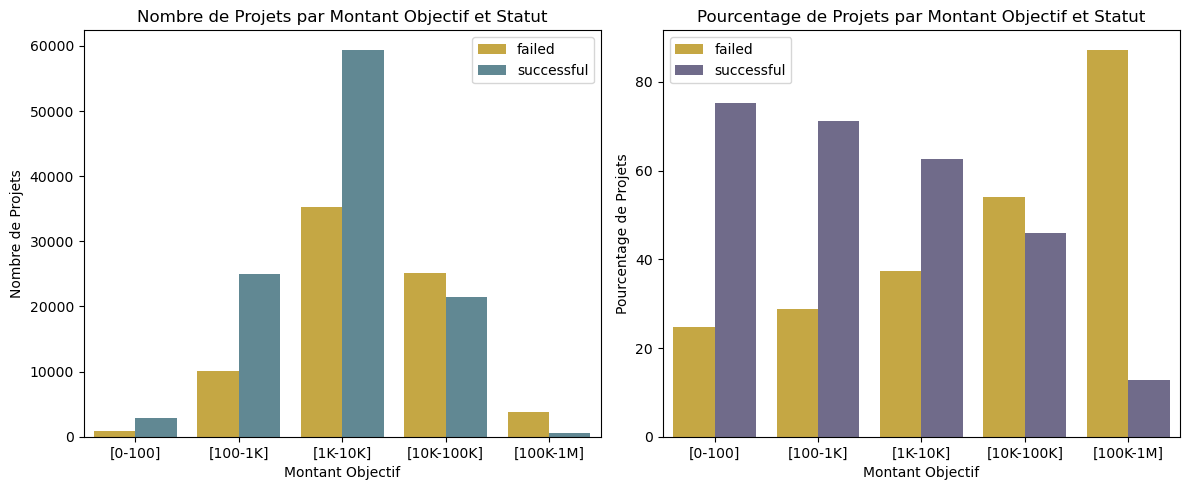

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous ayez un DataFrame appelé df contenant la colonne "goal_usd".

# Créer des catégories pour les montants objectifs
bins = [0, 100, 1000, 10000, 100000, 1000000]  # Définir les intervalles
labels = ['[0-100]', '[100-1K]', '[1K-10K]', '[10K-100K]', '[100K-1M]']  # Définir les libellés des catégories
df['goal_category'] = pd.cut(df['Goal'], bins=bins, labels=labels)

# Utiliser pd.crosstab() pour obtenir le décompte par catégorie et par statut
table = pd.crosstab(df['goal_category'], df['status'])

# Réorganiser les données pour les barres côte à côte
table_stacked = table.stack().reset_index().rename(columns={0: 'count'})
table_stacked = table_stacked.loc[(table_stacked['status'] == 'successful') | (table_stacked['status'] == 'failed')]

# Créer le premier graphique en subplot pour le nombre de projets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='goal_category', y='count', hue='status', data=table_stacked, palette=['#DAB22F', '#598D9B'])
plt.xlabel('Montant Objectif')
plt.ylabel('Nombre de Projets')
plt.title('Nombre de Projets par Montant Objectif et Statut')
plt.legend()

# Utiliser pd.crosstab() pour obtenir le décompte par catégorie et par statut pour les pourcentages
table_percent = table.div(table.sum(axis=1), axis=0) * 100
table_percent = table_percent.stack().reset_index().rename(columns={0: 'percentage'})
table_percent = table_percent.loc[(table_percent['status'] == 'successful') | (table_percent['status'] == 'failed')]

# Créer le deuxième graphique en subplot pour les pourcentages
plt.subplot(1, 2, 2)
sns.barplot(x='goal_category', y='percentage', hue='status', data=table_percent, palette=['#DAB22F', '#6C668F'])
plt.xlabel('Montant Objectif')
plt.ylabel('Pourcentage de Projets')
plt.title('Pourcentage de Projets par Montant Objectif et Statut')
plt.legend()

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques en subplot
plt.show()


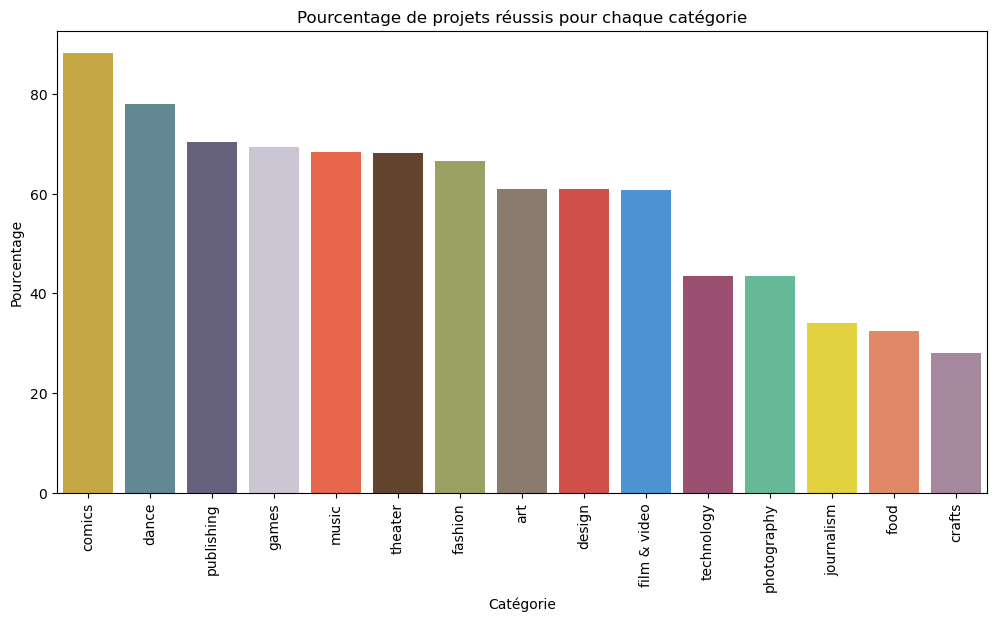

In [131]:
import matplotlib.cm as cm
# Filtrer les données pour n'inclure que les projets avec status == successful
filtered_data = df[df['status'] == 'successful']

# Calculer le nombre total de projets par catégorie
total_projects = df.groupby('Category').size().reset_index(name='total_count')

# Calculer le nombre de projets réussis par catégorie
successful_projects = filtered_data.groupby('Category').size().reset_index(name='successful_count')

# Fusionner les deux DataFrames pour obtenir le nombre total et le nombre de projets réussis par catégorie
data = total_projects.merge(successful_projects, on='Category', how='left')

# Calculer le pourcentage de projets réussis par rapport au nombre total de projets par catégorie
data['percentage'] = (data['successful_count'] / data['total_count']) * 100

# Trier les données par pourcentage décroissant
data = data.sort_values('percentage', ascending=False)

# Tracer le graphique à l'aide de Seaborn
plt.figure(figsize=(12, 6))
num_categories = len(data)
colors = [
    '#DAB22F', '#598D9B', '#635D83', '#CCC2D6', '#FF5733', 
    '#6B4226', '#A2AB58', '#8E7A6A', '#E73A32', '#3794E7',
    '#A8436D', '#57C798', '#FDE725', '#F57F53', '#AB83A1'
]

rainbow_colors = cm.rainbow([i/num_categories for i in range(num_categories)])
sns.barplot(x='Category', y='percentage', data=data, palette = colors)

# Personnaliser le titre du graphique et les labels d'axe
plt.title('Pourcentage de projets réussis pour chaque catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage')

# Faire pivoter les labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

In [132]:
df['launched_at'] = pd.to_datetime(df['launched_at'], format='%Y-%m-%d %H:%M')

#df['launched_at'] = df['launched_at'].apply(lambda df: pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M'))

import calendar
df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year
# Remplacer les mois numériques par les noms des mois
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
df.head(1)

,currency,launched_at,Backers,country,deadline,status,Pledged,Category,sub_category,blurb_length,Goal,city,duration,duration_category,goal_category,month,year
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,[50-60],[100-1K],February,2018


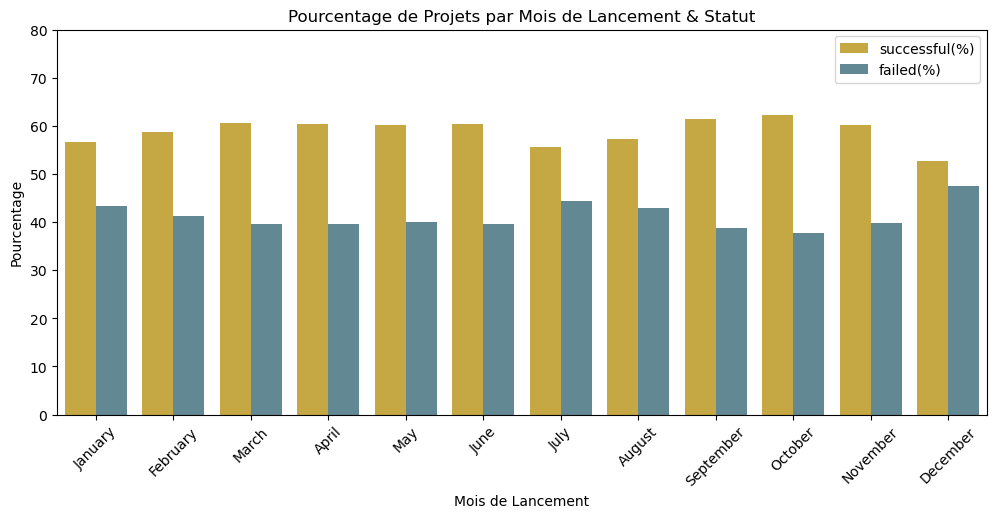

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype

# Supposons que vous ayez un DataFrame appelé df contenant la colonne "month" et "status".

# Utiliser pd.crosstab() pour obtenir le décompte par catégorie et par statut
table = pd.crosstab(df['month'], df['status'])

# Calculer les pourcentages de succès/échec
table['Total'] = table['successful'] + table['failed']
table['successful(%)'] = table['successful'] / table['Total'] * 100
table['failed(%)'] = table['failed'] / table['Total'] * 100
table_stacked = table[['successful(%)', 'failed(%)']].stack().reset_index().rename(columns={0: 'percentage'})

# Définir l'ordre des mois
month_order = list(calendar.month_name)[1:]
table_stacked['month'] = pd.Categorical(table_stacked['month'])
table_stacked['month'] = table_stacked['month'].astype(CategoricalDtype(categories=month_order, ordered=True))

# Créer le graphique en barres
plt.figure(figsize=(12, 5))
sns.barplot(x='month', y='percentage', hue='status', data=table_stacked, palette=['#DAB22F', '#598D9B'])

# Ajouter les labels et le titre
plt.xlabel('Mois de Lancement')
plt.ylabel('Pourcentage')
plt.title('Pourcentage de Projets par Mois de Lancement & Statut')
plt.ylim(0, 80)
plt.xticks(rotation=45)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [134]:
from datetime import datetime


#
df['launched_at'] = pd.to_datetime(df['launched_at'], errors='coerce')

# Vérifier les valeurs de date invalides


# Extraire le jour de la semaine
df['day_of_week'] = df['launched_at'].dt.strftime('%A')

# Afficher le DataFrame modifié

df.head()

,currency,launched_at,Backers,country,deadline,status,Pledged,Category,sub_category,blurb_length,Goal,city,duration,duration_category,goal_category,month,year,day_of_week
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,[50-60],[100-1K],February,2018,Saturday
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,[20-29],[0-100],November,2014,Friday
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,[30-39],[1K-10K],October,2020,Monday
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,[50-60],[10K-100K],May,2019,Wednesday
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,[30-39],[1K-10K],November,2015,Thursday


In [135]:
count_by_day = df['day_of_week'].value_counts().reset_index()
count_by_day.columns = ['day_of_week', 'count']
count_by_day = count_by_day.sort_values('day_of_week', ascending=True)
print(count_by_day)

  day_of_week  count
4      Friday  27552
2      Monday  31952
5    Saturday  14718
6      Sunday  11826
3    Thursday  28363
0     Tuesday  38494
1   Wednesday  31994


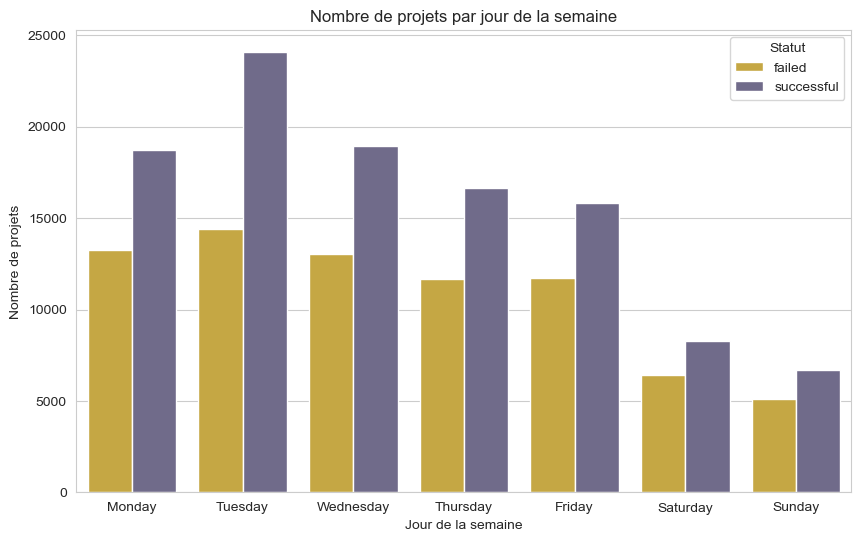

In [136]:
grouped_data = df.groupby(['day_of_week', 'status']).size().reset_index(name='count')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(x='day_of_week', y='count', hue='status', data=grouped_data, order=order, palette = ['#DAB22F', '#6C668F'])

plt.title('Nombre de projets par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de projets')
plt.legend(title='Statut')

plt.show()

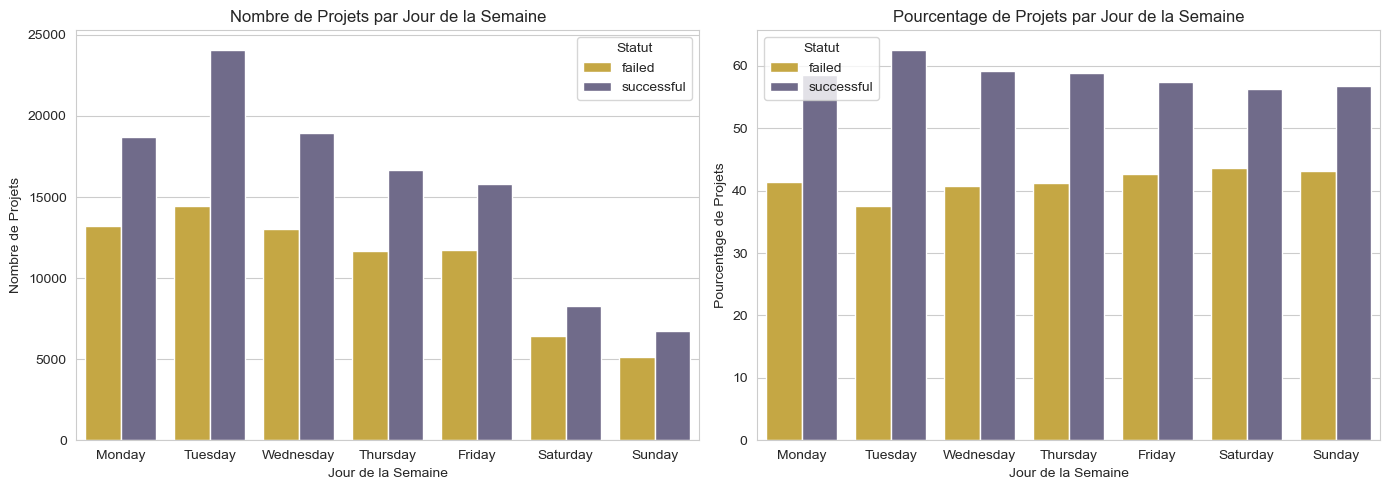

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous ayez un DataFrame appelé df contenant la colonne "day_of_week" et "status".

# Obtenir le décompte par jour de la semaine et par statut
grouped_data = df.groupby(['day_of_week', 'status']).size().reset_index(name='count')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculer les pourcentages de projets par jour de la semaine
total_per_day = df.groupby('day_of_week').size()
grouped_data['percentage'] = (grouped_data['count'] / grouped_data.groupby('day_of_week')['count'].transform('sum')) * 100

# Créer un sous-graphique pour afficher deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Premier graphique : nombre de projets par jour de la semaine
sns.set_style('whitegrid')
sns.barplot(x='day_of_week', y='count', hue='status', data=grouped_data, order=order, palette=['#DAB22F', '#6C668F'], ax=axes[0])

axes[0].set_title('Nombre de Projets par Jour de la Semaine')
axes[0].set_xlabel('Jour de la Semaine')
axes[0].set_ylabel('Nombre de Projets')
axes[0].legend(title='Statut')

# Deuxième graphique : pourcentages de projets par jour de la semaine
sns.barplot(x='day_of_week', y='percentage', hue='status', data=grouped_data, order=order, palette=['#DAB22F', '#6C668F'], ax=axes[1])

axes[1].set_title('Pourcentage de Projets par Jour de la Semaine')
axes[1].set_xlabel('Jour de la Semaine')
axes[1].set_ylabel('Pourcentage de Projets')
axes[1].legend(title='Statut')

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques côte à côte
plt.show()



In [138]:
data_num = df.select_dtypes(include = {'int','float'})
data_num = data_num.drop(['year'], axis = 1)
data_num.head()
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184899 entries, 0 to 197717
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Backers       184899 non-null  int64  
 1   Pledged       184899 non-null  float64
 2   blurb_length  184899 non-null  int64  
 3   Goal          184899 non-null  float64
 4   duration      184899 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 8.5 MB


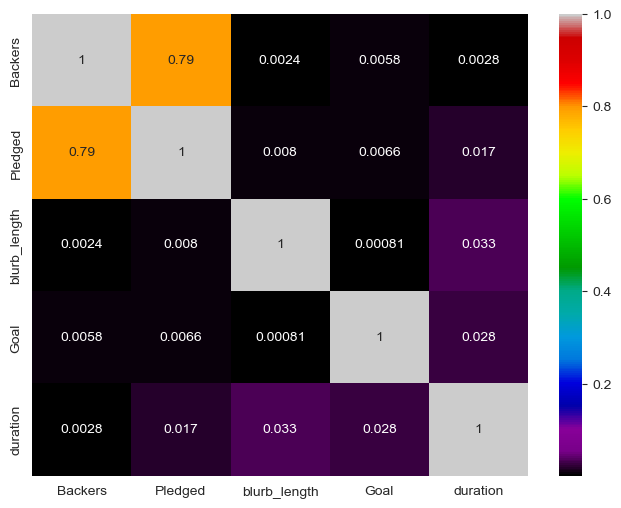

In [141]:


cmap = "nipy_spectral"

# Créez le heatmap avec la palette de couleurs spécifiée.
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data_num.corr(), annot=True, cmap=cmap)

# Affichez le heatmap.
plt.show()

